# Simulating Diffusion of a Spiral Distribution

This notebook demonstrates the diffusion process applied to a 2D spiral distribution. The main objective is to visualize how a structured dataset, such as a spiral, gradually becomes noisier and eventually disperses due to the diffusion process. This is achieved through a series of code blocks that generate the initial data, apply noise over time, and then animate the diffusion.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

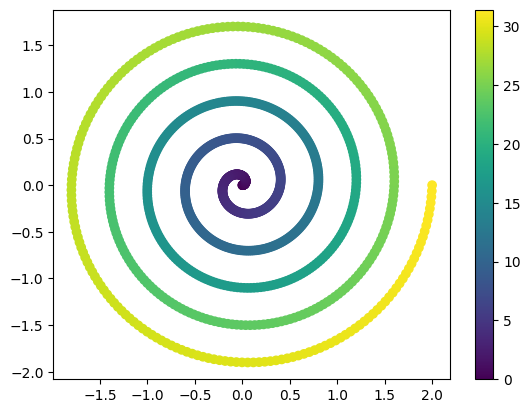

In [ ]:
theta = np.linspace(0, 10 * np.pi, 1000)
radius = np.linspace(0, 2, 1000)[:,None]
data = np.stack((np.cos(theta), np.sin(theta)), axis=1) * radius

fig, ax = plt.subplots()
plt.scatter(data[:,0], data[:,1], c=theta)
plt.colorbar()
plt.show()

Define the Diffusion Process

In [ ]:
def noisify_step(data, beta=1):
    noise = np.random.normal(0, np.sqrt(beta), size=data.shape)
    noisy_data = data*np.sqrt(1-beta) + noise
    return noisy_data

def noisify(data, t=0, steps=1000):
    out = data.copy()
    eps = 1e-3
    betas = np.linspace(0+eps,  1, steps)
    for t in range(0,int(t)):
        out = noisify_step(out, betas[t])
    return out

Animating the Diffusion

In [ ]:
from matplotlib.animation import FuncAnimation


def animate(data, frames_max=10, t_max=10, lim=3):
    fig, ax = plt.subplots()
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)

    plot = plt.scatter(data[:,0], data[:,1], c=theta)
    plt.colorbar()
    
    def update(frame):
        plot.set_offsets(noisify(data, frame, t_max))

    ani = FuncAnimation(fig=fig, func=update, frames=frames_max, interval=20)
    plt.close("all")
    return ani

In [ ]:
t_max = 1000
theta = np.linspace(0, 10 * np.pi, 1000)
radius = np.linspace(0, 2, 1000)[:,None]
data = np.stack((np.cos(theta), np.sin(theta)), axis=1) * radius

ani = animate(data, 100, t_max)
HTML(ani.to_jshtml())